In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [55]:
# 取得した株価データを読み込み
df = pd.read_csv('10company_StockPrice_adj_close_20200901-20201220.csv',index_col=0)

In [56]:
df.columns

Index(['1332.T', '1333.T', '1377.T', '1379.T', '1414.T', '1417.T', '1605.T',
       '1662.T', '1719.T', '1720.T'],
      dtype='object')

In [57]:
# 証券コードを社名に変更(自動で変えられるようにしたい)
df = df.rename(columns={'1332.T':'日本水産','1333.T':'マルハニチロ',
                       '1377.T':'サカタのタネ','1379.T':'ホクト',
                       '1414.T':'ショーボンドホールディングス',
                       '1417.T':'ミライト・ホールディングス',
                       '1605.T':'国際石油開発帝石',
                       '1662.T':'石油資源開発','1719.T':'安藤ハザマ',
                       '1720.T':'東急建設'})

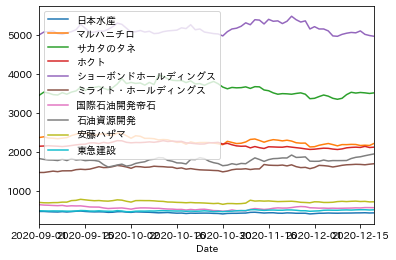

In [58]:
df.plot()

In [59]:
# 収益率の計算
df_returns = (df-df.shift(1))/df.shift(1)
# 標準偏差・分散・シャープレシオ
df_std = pd.DataFrame(df_returns.var(),columns=['Variance'])
df_mean = pd.DataFrame(df_returns.mean(),columns=['Mean'])
df_sharpR = pd.DataFrame(df_returns.mean()/df_returns.std(),columns=['Sharp Ratio'])


In [11]:
# 結果を結合
df_result = pd.concat([df_std,df_mean,df_sharpR],axis=1)

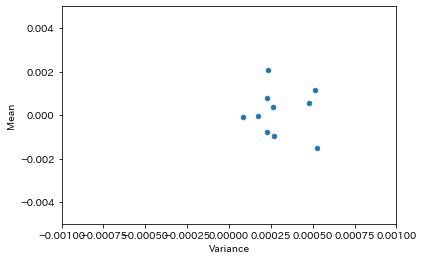

In [60]:
# 標準偏差と収益率のグラフ
fig,ax = plt.subplots()
ax.set_xlim(-0.001,0.001)
ax.set_ylim(-0.005,0.005)
df_result.plot.scatter(ax=ax,x='Variance',y='Mean')